From https://www.tensorflow.org/guide/basics

TensorFlow (TF) is an end-to-end platform for machine learning. It supports the following:

1. Multidimensional-array based numeric computation (similar to NumPy.)
2. GPU and distributed processing
3. Automatic differentiation
4. Model construction, training, and export
5. And more

---

Some important points about TF.

* TensorFlow was developed by the Google Brain team for internal use at Google. Then, it was made open source in November 2015.
* Keras is an API (application programming interface) for deep learning calculations. API means that Keras defines a specific interface to write codes.
* Keras was written in Python.
* Keras has multiple backends (libraries that are
responsible for doing the actual calculations): TensorFlow,
CNTK, Theano.
* Keras is focused on easy and fast prototyping, through
user friendliness, modularity, and extensibility.
* Although TF can be used as a backend for Keras, it is
recommended to use tf.keras, which is the implementation
of Keras in TF.





---

**Load essential libraries**

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import tensorflow as tf

C:\Users\adity\AppData\Local\Temp\ipykernel_19016\3405315510.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


---

**Check TensorFlow version**

---

In [2]:
tf.__version__

'2.12.1'

---
Introduction to tensors from https://www.tensorflow.org/guide/tensor

---

In [3]:
# Create a tensor
tensor = tf.constant([1, 2, 3, 4, 5])

# Print the tensor
print(tensor)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


---

Introduction to variables from https://www.tensorflow.org/guide/variable

---

In [4]:
# Create a tensor variable
tensor_variable = tf.Variable([1, 2, 3, 4, 5])

# Print the tensor variable
print(tensor_variable)


<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([1, 2, 3, 4, 5])>


---

Automatic differentiation using TF (https://www.tensorflow.org/guide/autodiff)

Example: calculate the sensitivity of $L(w) = 4w+w^3$ w.r.t. the input $w$ at $w=1.$

Sensitivity $\nabla_wL = 4+3w^2,$ which at $w=1$ is equal to $4+3\times1^2=7.$

---

tf.Tensor(7.0, shape=(), dtype=float32)


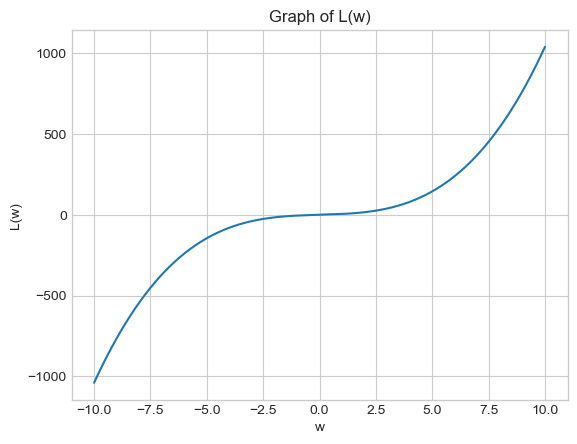

In [5]:
import numpy as np
# Define the function
def L(w):
    return 4 * w + w**3

# Define the input value
w = tf.Variable(1.0)

# Calculate the sensitivity using tf.GradientTape
with tf.GradientTape() as tape:
    tape.watch(w)
    loss = L(w)

sensitivity = tape.gradient(loss, w)

# Print the sensitivity
print(sensitivity)
# Import the necessary libraries
import matplotlib.pyplot as plt
# Define the function
def L(w):
    return 4 * w + w**3

# Define the range of values for w
w_values = np.linspace(-10, 10, 1000)

# Calculate the corresponding values of L(w)
L_values = L(w_values)

# Plot the graph
plt.plot(w_values, L_values)
plt.xlabel('w')
plt.ylabel('L(w)')
plt.title('Graph of L(w)')
plt.grid(True)
plt.show()


---

Example: calculate the sensitivity of $L(w_1,w_2) = w_1+w_2^2$ w.r.t. the inputs $w_1, w_2$ at $w_1=1, w_2=2.$

Setting $\mathbf{w} = \begin{bmatrix}w_1\\w_2\end{bmatrix},$ sensitivity $\nabla_\mathbf{w}L= \begin{bmatrix}\nabla_{w_1}(w_1+w_2^2)\\\nabla_{w_2}(w_1+w_2^2)\end{bmatrix} = \begin{bmatrix}1\\2w_2\end{bmatrix},$

 which at $w_1=1,w_2=2$ is equal to $\begin{bmatrix}1\\4\end{bmatrix}.$

 ---

In [6]:
import tensorflow as tf

# Define the function
def L(w1, w2):
    return w1 + w2**2

# Define the input values
w1 = tf.Variable(1.0)
w2 = tf.Variable(2.0)

# Calculate the sensitivity using tf.GradientTape
with tf.GradientTape() as tape:
    tape.watch([w1, w2])
    loss = L(w1, w2)

sensitivity = tape.gradient(loss, [w1, w2])

# Print the sensitivity
print(sensitivity)


[<tf.Tensor: shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: shape=(), dtype=float32, numpy=4.0>]


---

A `tf.Tensor` can be used as a variable using the `watch` function.

For example, consider calculating the sensitivity of $L(w) = w^4$ at $w=-3.$

The sensitivity is $\nabla_wL = 4w^3,$ which at $w=-3$ is equal to $4\times(-3)^3 = -108.$

---

---

We can use multiple tensor variables as input. This just means we calculate the sensitivity w.r.t. all the variables in the tensor.

For example, consider calculating the sensitivity of $L(w) = w[0]^2+w[1]^2$ at $w[0] = 1, w[1] = -3.$

---

---

When `g.gradient` is called with a tensor dependent variable (tensor target), it returns the sum of the sensitivities for each component of the target variable.

---

---

By default, when we call `g.gradient`, all resources required to compute the gradient are released. This allows saving memory. However, there are cases when we want to call `g.gradient` several times, for example, to differentiate different chained functions. In that case, we must use the option `persistent=True`.

---

---

We can easily calculate sensitivies of functions and plot them.

---